In [1]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

print(users)

[{'id': 0, 'name': 'Hero'}, {'id': 1, 'name': 'Dunn'}, {'id': 2, 'name': 'Sue'}, {'id': 3, 'name': 'Chi'}, {'id': 4, 'name': 'Thor'}, {'id': 5, 'name': 'Clive'}, {'id': 6, 'name': 'Hicks'}, {'id': 7, 'name': 'Devin'}, {'id': 8, 'name': 'Kate'}, {'id': 9, 'name': 'Klein'}]


In [2]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
print(friendship_pairs)

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


In [3]:
friendships = {user["id"]: [] for user in users}
print(friendships)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [4]:
for i, j in friendship_pairs:
    friendships[i].append(j) # j is a friend of user i
    friendships[j].append(i) # i is a friend of user j
    
print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [5]:
def number_of_friends(user):
    """How many friends does _user have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    num = len(friend_ids)
    print(f'User {user_id} has {num} connections.')
    return num

total_connections = sum(number_of_friends(user) for user in users)

print(total_connections)

User 0 has 2 connections.
User 1 has 3 connections.
User 2 has 3 connections.
User 3 has 3 connections.
User 4 has 2 connections.
User 5 has 3 connections.
User 6 has 2 connections.
User 7 has 2 connections.
User 8 has 3 connections.
User 9 has 1 connections.
24


In [6]:
num_users = len(users)
print(num_users)

10


In [7]:
avg_connections = total_connections / num_users
print(avg_connections)

2.4


In [8]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
print(num_friends_by_id)

User 0 has 2 connections.
User 1 has 3 connections.
User 2 has 3 connections.
User 3 has 3 connections.
User 4 has 2 connections.
User 5 has 3 connections.
User 6 has 2 connections.
User 7 has 2 connections.
User 8 has 3 connections.
User 9 has 1 connections.
[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [9]:
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)
print(num_friends_by_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [10]:
def foaf_ids_bad(user):
    """friend of a friend"""
    num = [foaf_id for friend_id in friendships[user["id"]] for foaf_id in friendships[friend_id]]
    return num

print(foaf_ids_bad(users[0]))

[0, 2, 3, 0, 1, 3]


In [11]:
from collections import Counter

def friends_of_friends(user):
    user_id = user["id"]
    num = Counter(foaf_id 
                  for friend_id in friendships[user_id] 
                  for foaf_id in friendships[friend_id]
                  if foaf_id != user_id
                  and foaf_id not in friendships[user_id]
                 )
    return num
    
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [12]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [13]:
def data_scientists_who_like(target_interest):
    """Find ids of users who like target interest"""
    return [user_id for user_id, user_interest in interests
           if user_interest==target_interest]

print(data_scientists_who_like("Java"))

[0, 5, 9]


In [14]:
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
print(user_ids_by_interest)

defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})


In [15]:
# Keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
    
print(interests_by_user_id)

defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression', 'decision trees', 'libsvm'], 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], 6: ['statistics', 'probability', 'mathematics', 'theory'], 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], 8: ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'], 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']})


In [16]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

In [17]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]


In [18]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [19]:
print(salary_by_tenure)

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})


In [20]:
print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [21]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than 2"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [22]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
print(salary_by_tenure_bucket)

defaultdict(<class 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'less than 2': [48000, 48000], 'between two and five': [60000, 63000]})


In [23]:
# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print(average_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than 2': 48000.0, 'between two and five': 61500.0}


In [24]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [25]:
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())

print(words_and_counts)

Counter({'big': 3, 'data': 3, 'java': 3, 'python': 3, 'learning': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine': 2, 'neural': 2, 'networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodels': 1, 'pandas': 1, 'decision': 1, 'trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming': 1, 'languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep': 1, 'artificial': 1, 'intelligence': 1, 'mapreduce': 1})


In [26]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [27]:
tweet = {
    "user": "joelgrus",
    "text": "Data Science is awesome",
    "retweet_count": 90,
    "hashtags": ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

In [28]:
print(tweet.keys())

dict_keys(['user', 'text', 'retweet_count', 'hashtags'])


In [29]:
print(tweet.values())

dict_values(['joelgrus', 'Data Science is awesome', 90, ['#data', '#science', '#datascience', '#awesome', '#yolo']])


In [30]:
print(tweet.items())

dict_items([('user', 'joelgrus'), ('text', 'Data Science is awesome'), ('retweet_count', 90), ('hashtags', ['#data', '#science', '#datascience', '#awesome', '#yolo'])])


In [31]:
print(90 in tweet)

False


In [32]:
print(90 in tweet.values())

True


In [33]:
print("text" in tweet)

True


In [34]:
document = "hey this is a test of a python dict test this should show us if the counts of words works"
print(document)

hey this is a test of a python dict test this should show us if the counts of words works


In [35]:
document = document.split(" ")
print(document)

['hey', 'this', 'is', 'a', 'test', 'of', 'a', 'python', 'dict', 'test', 'this', 'should', 'show', 'us', 'if', 'the', 'counts', 'of', 'words', 'works']


In [36]:
word_counts = {}
for word in document:
    try:
        word_counts[word] += 1
    except:
        word_counts[word] = 1
        
print(word_counts)

{'hey': 1, 'this': 2, 'is': 1, 'a': 2, 'test': 2, 'of': 2, 'python': 1, 'dict': 1, 'should': 1, 'show': 1, 'us': 1, 'if': 1, 'the': 1, 'counts': 1, 'words': 1, 'works': 1}


In [37]:
from collections import Counter
word_counts = Counter(document)
print(word_counts)

Counter({'this': 2, 'a': 2, 'test': 2, 'of': 2, 'hey': 1, 'is': 1, 'python': 1, 'dict': 1, 'should': 1, 'show': 1, 'us': 1, 'if': 1, 'the': 1, 'counts': 1, 'words': 1, 'works': 1})


In [38]:
print(word_counts.most_common(10))

[('this', 2), ('a', 2), ('test', 2), ('of', 2), ('hey', 1), ('is', 1), ('python', 1), ('dict', 1), ('should', 1), ('show', 1)]


In [39]:
for word, count in word_counts.most_common(10):
    print(word, count)

this 2
a 2
test 2
of 2
hey 1
is 1
python 1
dict 1
should 1
show 1


In [40]:
# {"": , "": } DICT
# [] LIST
# () TUPLE
# {2, 3} SET, no duplications

# 'in' is very fast on sets and dicts

def remove_duplicates_in_list(words):
    return list(set(words))

In [41]:
print(type(document))

<class 'list'>


In [42]:
document_no_duplicates = remove_duplicates_in_list(document)
print(document_no_duplicates)

['should', 'test', 'python', 'hey', 'works', 'the', 'counts', 'us', 'a', 'show', 'is', 'words', 'this', 'dict', 'if', 'of']


In [43]:
print(type(document_no_duplicates))

<class 'list'>


In [44]:
x = sorted(word_counts.most_common(10), key=lambda word_and_count: word_and_count[1], reverse=True)
print(x)

[('this', 2), ('a', 2), ('test', 2), ('of', 2), ('hey', 1), ('is', 1), ('python', 1), ('dict', 1), ('should', 1), ('show', 1)]


In [45]:
x2 = sorted(word_counts.values(), reverse=True)
print(x2)

[2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [46]:
class CountClicker:
    """Class with a docstring"""
    def __init__(self, count=0):
        self.count = count
        
    def __repr__(self):
        return f"CountClicker(count={self.count})"
    
    def click(self, num_times=1):
        """Click the clicker a number of times"""
        self.count += num_times
        
    def read(self):
        return self.count
    
    def reset(self):
        self.count = 0

In [47]:
clicker1 = CountClicker()
clicker2 = CountClicker(100)
clicker3 = CountClicker(count=100)

print(clicker1.__repr__())

CountClicker(count=0)


In [48]:
clicker = CountClicker()
assert clicker.read() == 0, f"Clicker.read supposed to be 0, got {clicker.read()}"

clicker.click()
clicker.click()
assert clicker.read() == 2, f"Clicker.read supposed to be 2, got {clicker.read()}"

clicker.reset()
assert clicker.read() == 0, f"Clicker.read supposed to be 0 after reset, got {clicker.read()}"

In [49]:
names = ["Alice", "Bob", "Charlie", "Debbie"]
print(names)

['Alice', 'Bob', 'Charlie', 'Debbie']


In [50]:
print(enumerate(names))

In [51]:
for i, name in enumerate(names):
    print(f"name {i} is {name}")

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


In [52]:
names = {"Alice", "Bob", "Charlie", "Debbie"}
print(names)

{'Debbie', 'Alice', 'Bob', 'Charlie'}


In [53]:
print(enumerate(names))

In [54]:
for i, name in enumerate(names):
    print(f"name {i} is {name}")

name 0 is Debbie
name 1 is Alice
name 2 is Bob
name 3 is Charlie


In [55]:
names = {"name": ["Alice", "Bob", "Charlie", "Debbie"], "age": [29, 35, 21, 49]}
print(names.keys())
for item in names.items():
    print(item)

dict_keys(['name', 'age'])
('name', ['Alice', 'Bob', 'Charlie', 'Debbie'])
('age', [29, 35, 21, 49])


In [56]:
evens_below_20 = (i for i in range(20) if i%2 == 0)
for j in evens_below_20:
    print(j)

0
2
4
6
8
10
12
14
16
18


In [57]:
def natural_numbers():
    """returns 1, 2, 3..."""
    n = 1
    while True:
        yield n
        n += 1
        
data = natural_numbers()
evens = (x for x in data if x%2 == 0)
even_squares = (x ** 2 for x in evens)
even_squares_ending_in_6 = (x for x in even_squares if x % 10 == 6)

## Randomness

In [58]:
# random.random()
# random.seed()
# random.randrange()
# random.shuffle()
# random.choice()

In [59]:
import random
random.seed(10) # ensures consistent results

In [60]:
random.seed(10) # ensures consistent results
four_uniform_randoms = [random.random() for _ in range(4)]
print(four_uniform_randoms)

[0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174]


In [61]:
random.seed(10) # ensures consistent results
four_uniform_randoms = (random.random() for _ in range(4))
for _ in four_uniform_randoms:
    print(_)


0.5714025946899135
0.4288890546751146
0.5780913011344704
0.20609823213950174


In [62]:
print(random.randrange(10))

7


In [63]:
count = 0
three_count = 0
for x in range(100):
    y = random.randrange(3,5)
    count += 1
    if y == 3:
        three_count += 1
    print(f"50pct theoretical, {three_count/count*100}pct real")
    


50pct theoretical, 0.0pct real
50pct theoretical, 50.0pct real
50pct theoretical, 66.66666666666666pct real
50pct theoretical, 50.0pct real
50pct theoretical, 40.0pct real
50pct theoretical, 50.0pct real
50pct theoretical, 57.14285714285714pct real
50pct theoretical, 50.0pct real
50pct theoretical, 55.55555555555556pct real
50pct theoretical, 50.0pct real
50pct theoretical, 54.54545454545454pct real
50pct theoretical, 50.0pct real
50pct theoretical, 46.15384615384615pct real
50pct theoretical, 42.857142857142854pct real
50pct theoretical, 40.0pct real
50pct theoretical, 37.5pct real
50pct theoretical, 35.294117647058826pct real
50pct theoretical, 38.88888888888889pct real
50pct theoretical, 36.84210526315789pct real
50pct theoretical, 35.0pct real
50pct theoretical, 38.095238095238095pct real
50pct theoretical, 36.36363636363637pct real
50pct theoretical, 39.130434782608695pct real
50pct theoretical, 37.5pct real
50pct theoretical, 36.0pct real
50pct theoretical, 38.46153846153847pct r

In [64]:
cups = [1, 2, 3]
random.shuffle(cups)
print(cups)

[1, 3, 2]


In [65]:
for x in range(15):
    random.shuffle(cups)
    print(cups)
    
random.shuffle(cups)
y = input("Now, which position is ball 1?: ")
if(cups[int(y)-1] == 1):
    print(f"Correct! balls were {cups}")
else:
    print(f"Incorrect! balls were {cups}")

[1, 3, 2]
[2, 1, 3]
[2, 1, 3]
[3, 1, 2]
[1, 2, 3]
[3, 1, 2]
[2, 1, 3]
[1, 3, 2]
[2, 3, 1]
[1, 2, 3]
[1, 3, 2]
[1, 3, 2]
[1, 2, 3]
[1, 2, 3]
[1, 3, 2]
Now, which position is ball 1?: 3
Incorrect! balls were [3, 1, 2]


In [66]:
my_best_friend = random.choice(['Bob', 'Alice', 'Borat'])
print(f"My best friend is {my_best_friend}")

My best friend is Borat


In [67]:
import re

re_examples = [
    not re.match("a", "cat"),
    re.search("a", "cat"),
    not re.search("c", "dog"),
    3 == len(re.split("[ab]", "carbs")),
    "R-D-" == re.sub("[0-9]", "-", "R2D2")
]

assert all(re_examples), "All should be True"

In [68]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]
for pair in zip(list1, list2):
    print(pair)

('a', 1)
('b', 2)
('c', 3)


In [69]:
pairs = [('a', 1), ('b', 2), ('c', 3)]
letters, numbers = zip(*pairs)
print(f"Letters are {letters}, Numbers are {numbers}")

Letters are ('a', 'b', 'c'), Numbers are (1, 2, 3)


In [70]:
def doubler(f):
    def g(x):
        return 2 * f(x)
    
    return g

def f1(x):
    return x + 1

g = doubler(f1)
assert g(3) == 8, "(3 + 1) * 2 should equal 8"
assert g(-1) == 0, "(-1 + 1) * 2 should equal 0"


In [71]:
def magic(*args, **kwargs):
    print("unnamed args:", args)
    print("keyword args:", kwargs)
    
magic(1, 2, 3, 4, 5)

unnamed args: (1, 2, 3, 4, 5)
keyword args: {}


In [72]:
magic("stringy", str="five", foo="bar")

unnamed args: ('stringy',)
keyword args: {'str': 'five', 'foo': 'bar'}


In [73]:
def other_way_magic(x, y, z):
    return x + y + z

x_y_list = [1, 2]
z_dict = {"z": 3}
assert other_way_magic(*x_y_list, **z_dict) == 6, "1+2+3 = 6"

In [74]:
from typing import List

def total(xs: List[float]) -> float:
    return sum(xs)

print(total([3.5, 4.54, 2.3454545]))

10.3854545


In [75]:
def no_return(num: float) -> None:
    num = num * 2
    print(num)

In [76]:
foobar = 2
print(foobar)

2


In [77]:
no_return(foobar)

4


## Ch 4 Linear Algebra : Vectors

In [78]:
from typing import List
Vector = List[float]

def vector_add(v: Vector, w: Vector) -> Vector:
    """Adds vectors"""
    assert len(v) == len(w), "Vectors should be the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert vector_add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

In [79]:
a = [1, 1, 2]
b = [2, 4, 3]
assert len(a) == len(b), "Vectors should be the same length"
c = zip(a, b)
for i, j in c:
    print(f"c is {i}, {j}")

c is 1, 2
c is 1, 4
c is 2, 3


In [80]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies elements by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6], "Doesn't work!"
    
    

In [81]:
def dot(v: Vector, w: Vector) -> float:
    """Computes dot product"""
    assert len(v) == len(w), "Vectors should be same length"
    return sum(vi * wi for vi, wi in zip(v, w))

assert dot([1, 2, 3], [2, 3, 4]) == 20, "Dot product is not correct"

In [82]:
Matrix = List[List[float]]

In [83]:
from typing import Tuple

def shape_matrix(A: Matrix) -> Tuple[int, int]:
    """Returns num rows and num cols"""
    num_rows = len(A)
    num_cols = len(A[0])
    return num_rows, num_cols

assert shape_matrix([[1, 2, 3], [4, 5, 6]]) == (2, 3)

In [84]:
def get_row(A: Matrix, i: int) -> Vector:
    """returns i-th row of Matrix"""
    return A[i]

def get_col(A: Matrix, j: int) -> Vector:
    """returns j-th column of Matrix"""
    return [A_i[j] for A_i in A]



In [85]:
from typing import Callable

def make_matrix(num_rows: int, num_cols: int, entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j) entry is entry_fn(i,j)
    """
    return [[ entry_fn(i,j)              # given i, create a list
            for j in range(num_cols)]    #  [entry_fn(i,0), ...]
           for i in range(num_rows)]     # create one list for each i

def identity_matrix(n: int) -> Matrix:
    """Returns n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                             [0, 1, 0, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 1]]

## Ch 5 Statistics

In [89]:
num_friends = [100, 49, 41, 40, 25, 36, 73, 74, 222, 11, 65]

In [90]:
from scratch.linear_algebra import dot

In [91]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys lists should have equal lengths"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

NameError: name 'daily_minutes' is not defined

## Ch 6 Probability

In [94]:
import enum, random

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    
    if older == Kid.GIRL:
        older_girl += 1
    
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
    
print(f"P(both | older): {both_girls/older_girl}")
print(f"P(both | either): {both_girls/either_girl}")
      

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


In [100]:
import math
SQRT_2PI = math.sqrt(2*math.pi)

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    """cumulative distribution function, starts at 0 ends at 1, mu=mean, sigma=st.dev."""
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    """probability distribution function (bell curve), mu=mean, sigma=st.dev."""
    return math.exp(-1*((x-mu)**2) / 2 / sigma / sigma ) / (SQRT_2PI * sigma) 
    

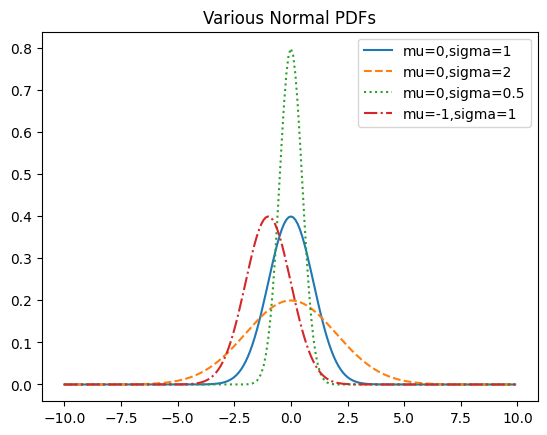

In [101]:
import matplotlib.pyplot as plt

xrange = [x/10 for x in range(-100,100)]
plt.plot(xrange, [normal_pdf(x, sigma=1) for x in xrange], '-', label='mu=0,sigma=1')
plt.plot(xrange, [normal_pdf(x, sigma=2) for x in xrange], '--', label='mu=0,sigma=2')
plt.plot(xrange, [normal_pdf(x, sigma=0.5) for x in xrange], ':', label='mu=0,sigma=0.5')
plt.plot(xrange, [normal_pdf(x, mu=-1) for x in xrange], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal PDFs")
plt.show()

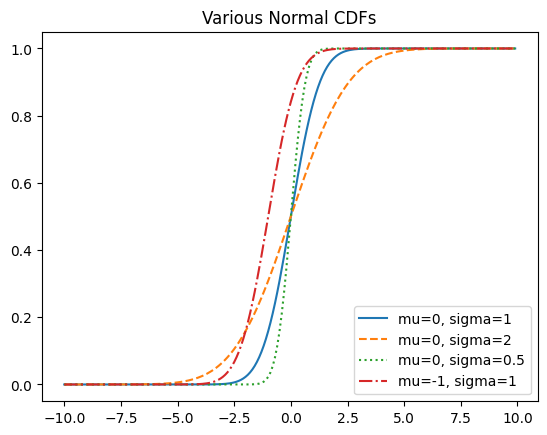

In [102]:
xrange = [x/10 for x in range(-100,100)]
plt.plot(xrange, [normal_cdf(x, sigma=1) for x in xrange], '-', label='mu=0, sigma=1')
plt.plot(xrange, [normal_cdf(x, sigma=2) for x in xrange], '--', label='mu=0, sigma=2')
plt.plot(xrange, [normal_cdf(x, sigma=0.5) for x in xrange], ':', label='mu=0, sigma=0.5')
plt.plot(xrange, [normal_cdf(x, mu=-1) for x in xrange], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title('Various Normal CDFs')
plt.show()

## Ch 7 Hypothesis and Inference

In [103]:
from typing import Tuple 
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """function to provide mean mu and st.dev. sigma for a number of binomial trials with probability p"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return (mu, sigma)

In [104]:
normal_probability_below = normal_cdf

def normal_probability_above(x: float, mu: float = 0, sigma: float = 1) -> float:
    """1 - CDF, the complement to the CDF function"""
    return 1 - normal_probability_below(x, mu, sigma)

def normal_probability_between(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    """Probability that an N(mu, sigma) is between lo and hi"""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    """Probability that an N(mu, sigma) is outside of lo and hi"""
    return 1 - normal_probability_outside(lo, hi, mu, sigma)

In [105]:
from scratch.probability import inverse_normal_cdf

<Figure size 640x480 with 0 Axes>

In [109]:
def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """return z for which probability(Z<=z) = input probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """return z for which probability(Z>=z) = input probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float, mu: float = 0, sigma: float = 1) -> Tuple[float, float]:
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2
    
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    
    return lower_bound, upper_bound

In [110]:
### now we begin the experiment with our functions

mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5) #1000 coin tosses at 50% probability each

Willingness to accept results is often either 5% or 1%

In [111]:
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 469.01026640487555
Upper Bound: 530.9897335951244


So if H_0 is true (H_0 = coin is fair, p=0.5), then only 5% chance that X lies outside of this interval

In [112]:
# now we will see how to compute the probability, given a certain number of heads (x=1 values)
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """How likely are we to see a value at least as extreme as x, given an N(mu, sigma)"""
    if x>= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, my, sigma)

In [113]:
tmp = two_sided_p_value(529.5, mu_0, sigma_0)
print(tmp)

0.06207721579598835


In [116]:
# let's test that fact with a simulation (page 91 of the book)
extreme_value_count = 0
for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                   for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1
        
print(f"Extreme value count is {extreme_value_count}")        
# p-value was 0.062 -> ~62 values out of 1000 are extreme
assert 59 < extreme_value_count < 65, f"Extreme value count is {extreme_value_count}"

Extreme value count is 61


In [117]:
# Since p value above was greater than 0.05 (was 0.062, 62 out of 1000), we don't reject N_0 
# if p value is less than 0.05, we reject the null


A procedure that erroneaously rejects the null hypothesis only 5% of the time will--by definition--5% of the time erroneously reject the null hypothesis

In [118]:
from typing import List

def run_experiment() -> List[bool]:
    """Run experiment of flipping coin 1000 times, 1 if heads"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(10)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])

assert num_rejections == 46, "num_rejections not 46"